<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a los datos

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [2]:
!pip3 install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [4]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [5]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en galones por milla) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo.

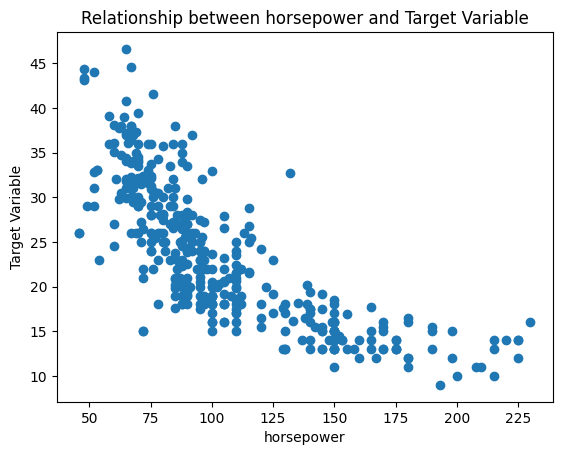

In [12]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # TODO dibuja la gráfica
    # Extraemos la columna específica del DataFrame
    x = df[nombre_columna]
    
    # Dibujamos el gráfico de dispersión
    plt.scatter(x, y)
    
    # Etiquetas para los ejes
    plt.xlabel(nombre_columna)
    plt.ylabel('Target Variable')
    
    # Título del gráfico
    plt.title(f'Relationship between {nombre_columna} and Target Variable')
    
    # Mostramos la gráfica
    plt.show()

    

visualiza(X, y, 'horsepower')



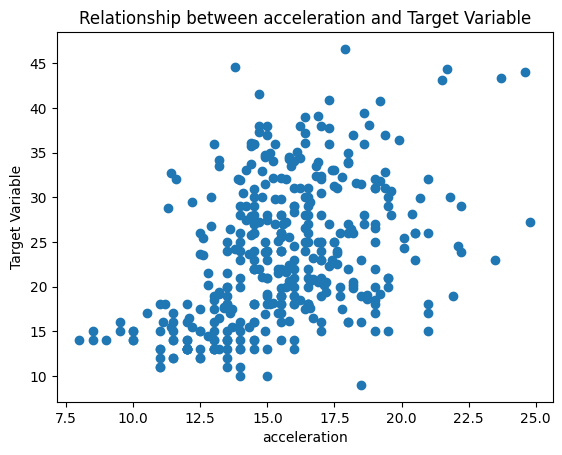

In [13]:
visualiza(X, y, 'acceleration')

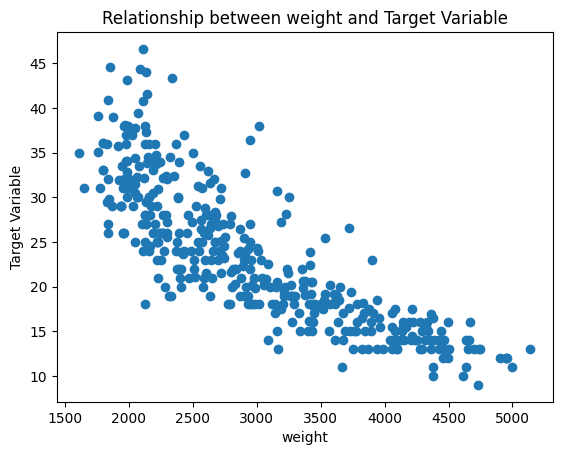

In [14]:
visualiza(X, y, 'weight')

Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [47]:
import numpy as np
import pandas as pd

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    
    if X.shape[1] > X.shape[0]:
        X = X.T

    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    
    sh=X.shape
    ones = np.ones((sh[0],1))
    X_b = np.concatenate((ones, X), axis = 1)
    X_bt = np.transpose(X_b)
    

    # TODO 3 Calcula los pesos
    w = np.linalg.inv(np.dot(X_bt, X_b)).dot(X_bt).dot(y)
    
    return w

In [48]:
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

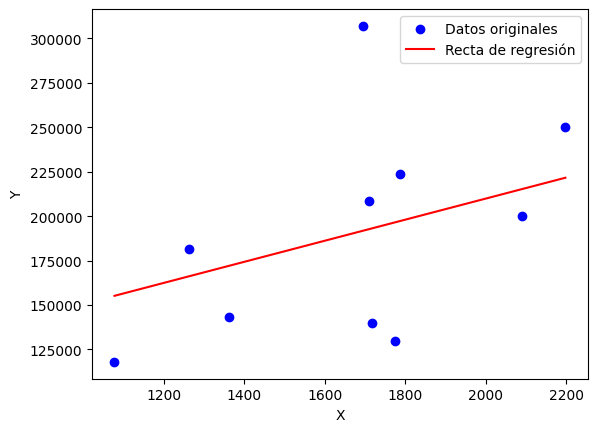

In [59]:
plt.scatter(X[0], y, color='blue', label='Datos originales')

# Calcula los valores predichos
X_new = np.linspace(min(X[0]), max(X[0]), 100)
X_new_b = np.hstack((np.ones((X_new.shape[0], 1)), X_new.reshape(-1, 1), np.full((X_new.shape[0], 1), np.mean(X[1]))))
y_pred = X_new_b @ pesos_ols(X, y)

# Dibuja la recta de regresión
plt.plot(X_new, y_pred, color='red', label='Recta de regresión')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [83]:
col_conv = ['horsepower', 'acceleration', 'weight']
new_df = auto_mpg.data.features['weight']

# Convertimos el DataFrame seleccionado en un array de NumPy
datos_np = new_df.to_numpy()

# Verificamos las dimensiones del array para asegurar que es correcto
print(datos_np.shape)


(398, 3)


In [84]:
datos_np

array([[ 130. ,   12. , 3504. ],
       [ 165. ,   11.5, 3693. ],
       [ 150. ,   11. , 3436. ],
       ...,
       [  84. ,   11.6, 2295. ],
       [  79. ,   18.6, 2625. ],
       [  82. ,   19.4, 2720. ]])

Pendiente: [-0.00767661]
Punto de corte: [46.31736442]


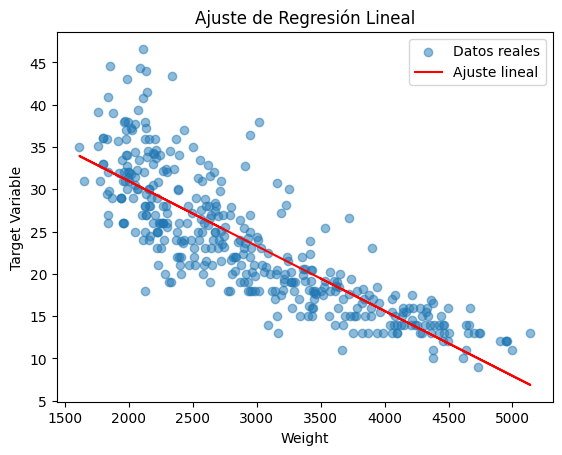

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Usasremos los datos de weight como datos para X y los datos target para Y
datos_wei = auto_mpg.data.features['weight'].to_numpy().reshape(-1, 1)
y_np = auto_mpg.data.targets.to_numpy()

# Aplicamos la función pesos_ols para obtener los coeficientes de la regresión
w = pesos_ols(datos_wei, y_np)

# Extraemos la pendiente y el punto de corte (intercepto)
punto_corte = w[0]
pendiente = w[1]

# Imprimimos la pendiente y el punto de corte
print(f"Pendiente: {pendiente}")
print(f"Punto de corte: {punto_corte}")

# Calculamos las predicciones de y (y_pred) usando los coeficientes obtenidos
# Agregamos una columna de unos para el término independiente en datos_wei
X_b = np.concatenate((np.ones((datos_wei.shape[0], 1)), datos_wei), axis=1)
y_pred = X_b @ w

# Visualizamos los datos originales y la recta ajustada
plt.scatter(datos_wei, y_np, label='Datos reales', alpha=0.5)
plt.plot(datos_wei, y_pred, color='red', label='Ajuste lineal')

plt.xlabel('Weight')
plt.ylabel('Target Variable')
plt.title('Ajuste de Regresión Lineal')
plt.legend()
plt.show()

In [87]:
datos_np


array([[ 130. ,   12. , 3504. ],
       [ 165. ,   11.5, 3693. ],
       [ 150. ,   11. , 3436. ],
       ...,
       [  84. ,   11.6, 2295. ],
       [  79. ,   18.6, 2625. ],
       [  82. ,   19.4, 2720. ]])

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [67]:

from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

## Conclusión

Con este ejercicio hemos conseguido aplicar un modelo de regresión lineal utilizando la variable "weight" como predictor para la variable "millas por galón". Para ello, hemos creado un modelo de regresión lineal mediante el método matricial de mínimos cuadrados. 

Los valores que hemos obtenido son:

Pendiente: [-0.00767661]
Intercepto: [46.31736442]

Gracias a estos valores podemos definir la recta de regresión:

$y = -0.00767661 \times \text{weight} + 46.31736442$


También hemos hecho el mismo cálculo utilizando el método sklearn donde hemos obtenido los mismos valores para la recta de regresión.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal

El método de mínimos cuadrados nos proporciona una recta de regresión lineal, que es la solución que buscamos, la cual es ideal para un conjunto de datos pequeño, pero cuando dataset que tenemos es muy grande empieza a fallar, por lo que es mejor utilizar el método de descenso del gradiente que utiliza iteraciones para buscar la solución. Tendríamos que variar el número de iteraciones para adaptarlo al tamaño de nuestro conjunto de datos

## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [115]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    
    X_ones = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    # TODO 2 Haz un bucle para las iteraciones 

    for i in range(n_iter):
        y_hat = np.dot(X_ones, w)
        error = y_hat - y
        rss_iter = (1/2) * np.dot(error.T, error) # 1/2 * (y_hat - y)^2
        grad_rss = np.dot(X_ones.T, error)
        w = w - eta * grad_rss # Actualización de los pesos
        
        # Guardamos los valores actuales
        w_iter.append(w)
        loss_iter.append(rss_iter[0, 0])
    
    # Devolvemos los pesos finales y la pérdida en cada iteración
    return np.array(w_iter), np.array(loss_iter)

    
# Parámetros del modelo
eta = 0.01 
iteraciones = 2000 

# Inicialización de los pesos
np.random.seed(123)
w0 = np.random.rand(2, 1)

# Datos de ejemplo
y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5, 1))
X = np.array([[ 0.37020659],
              [-0.48234664],
              [ 0.51483616],
              [ 0.38352774],
              [ 1.29888065]])

# Ejecutamos el descenso del gradiente
weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

# Mostramos los pesos finales
print("Pesos finales:", weights[-1])

Pesos finales: [[183845.82320222]
 [ 40415.66453324]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [62]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

/var/folders/05/sv8_llj514lcq63wxpr_x0gr0000gn/T/ipykernel_12749/112640472.py:22: RuntimeWarning: invalid value encountered in subtract
  w = w - eta * grad_rss # Actualización de los pesos


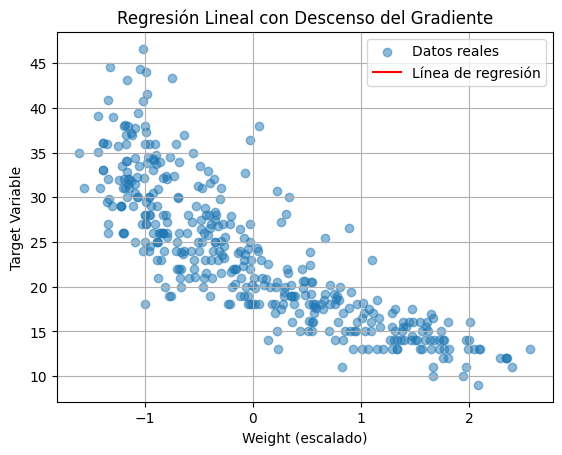

In [121]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate

eta = 0.01
iteraciones = 2000
np.random.seed(123)
w0 = np.random.rand(2, 1)

# TODO 2 Aplicamos el algoritmo

weights, loss = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica

x_values = np.linspace(x_min, x_max, 100)
X_b = np.c_[np.ones((100, 1)), x_values]  # Añadir columna de unos para el intercepto
y_pred = X_b @ weights[-1]  # Predicciones con los pesos finales

# Dibuja la gráfica
plt.scatter(X_gd, y_gd, label='Datos reales', alpha=0.5)
plt.plot(x_values, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Weight (escalado)')
plt.ylabel('Target Variable')
plt.title('Regresión Lineal con Descenso del Gradiente')
plt.legend()
plt.grid(True)
plt.show()